<a href="https://colab.research.google.com/github/LeonieFetzer/DHBW_kNN_Gruppe-3/blob/main/Logistische_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datensatz

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Datensatz importieren
from google.colab import files
uploaded = files.upload()

import pandas as pd
telefonkunden = pd.read_csv('telefonkunden.csv')

Saving telefonkunden.csv to telefonkunden.csv


In [ ]:
print("Anzahl Zeilen, Spalten:", telefonkunden.shape)
print("Spaltennamen:", telefonkunden.columns.tolist())
print(telefonkunden.head(5))  # die ersten 5 Zeilen ausgeben

# Prüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:\n", telefonkunden.isnull().sum())

# Separieren von Features (X) und Zielvariable (y)
X = telefonkunden.drop('custcat', axis=1)   # alle Spalten außer 'custcat' als Features; .drop löscht Spalten
y = telefonkunden['custcat']               # Zielvariable 'custcat'

Anzahl Zeilen, Spalten: (1000, 12)
Spaltennamen: ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  custcat  
0       2        1  
1       6        4  
2       2        3  
3       1        1  
4       4        3  

Fehlende Werte pro Spalte:
 region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64


# Aufteilung Datensatz

In [ ]:
from sklearn.model_selection import train_test_split

# Datensatz aufteilen in 80% Training und 20% Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

#Parameter der Daten ausgeben
print("Trainingsdaten:", X_train.shape, "Trainingslabels:", y_train.shape)
print("Testdaten:", X_test.shape, "Testlabels:", y_test.shape)

Trainingsdaten: (800, 11) Trainingslabels: (800,)
Testdaten: (200, 11) Testlabels: (200,)


# Logistische Regression


In [ ]:
# Standardisierung
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Basismodell
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model_logreg = LogisticRegression(max_iter=1000, random_state=0)
model_logreg.fit(X_train_scaled, y_train)

# Vorhersage auf Testdaten
y_pred_logreg = model_logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Genauigkeit (Basismodell, skaliert): {accuracy_logreg:.3f}')

LogisticRegression(max_iter=1000, random_state=0)

Genauigkeit (Basismodell, skaliert): 0.375


In [ ]:
#Erarbeiten der besten Parameter
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=1),
                                   param_grid,
                                   cv=5)

grid_search.fit(X_train_scaled, y_train)

print("Beste Genauigkeit:", grid_search.best_score_)
print("Bestes Modell:", grid_search.best_estimator_) # optimale Parameter

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Beste Genauigkeit: 0.41000000000000003
Bestes Modell: LogisticRegression(C=0.01, max_iter=1000, multi_class='multinomial',
                   random_state=1)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Bestes Modell aus Grid Search übernehmen
best_logreg = grid_search.best_estimator_

# Kreuzvalidierung durchführen, um Stabilität zu testen
cv_scores = cross_val_score(best_logreg, X_train_scaled, y_train, cv=5)
cv_mean = cv_scores.mean()

# Genauigkeit auf Trainingsdaten ermitteln
train_acc = accuracy_score(y_train, best_logreg.predict(X_train_scaled))
# Genauigkeit auf Testdaten ermitteln
test_acc = accuracy_score(y_test, best_logreg.predict(X_test_scaled))

print(f"Cross-Validation Accuracy (Mittelwert): {cv_mean:.4f}")
print(f"Genauigkeit auf Trainingsdaten: {train_acc:.4f}")
print(f"Genauigkeit auf Testdaten: {test_acc:.4f}")

Cross-Validation Accuracy (Mittelwert): 0.4100
Genauigkeit auf Trainingsdaten: 0.4238
Genauigkeit auf Testdaten: 0.4050


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

# Evaluation

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Confusion Matrix Heatmap der Logischen Regression')

Text(0.5, 36.72222222222221, 'Vorhergesagter Service-Umfang')

Text(70.72222222222221, 0.5, 'Tatsächlicher Service-Umfang')

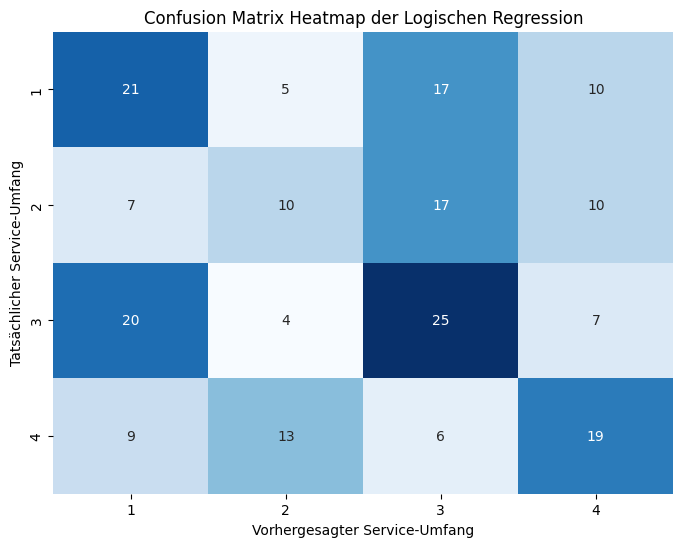

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion-Matrix berechnen
matrix = confusion_matrix(y_test, y_pred_logreg)
labels = sorted(y.unique())

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Heatmap der Logischen Regression')
plt.xlabel('Vorhergesagter Service-Umfang')
plt.ylabel('Tatsächlicher Service-Umfang')
plt.show()

<Figure size 800x600 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 0, 'Klasse')

Text(0, 0.5, 'F1-Score')

Text(0.5, 1.0, 'F1-Score pro Klasse – Logistische Regression')

(0.0, 1.0)

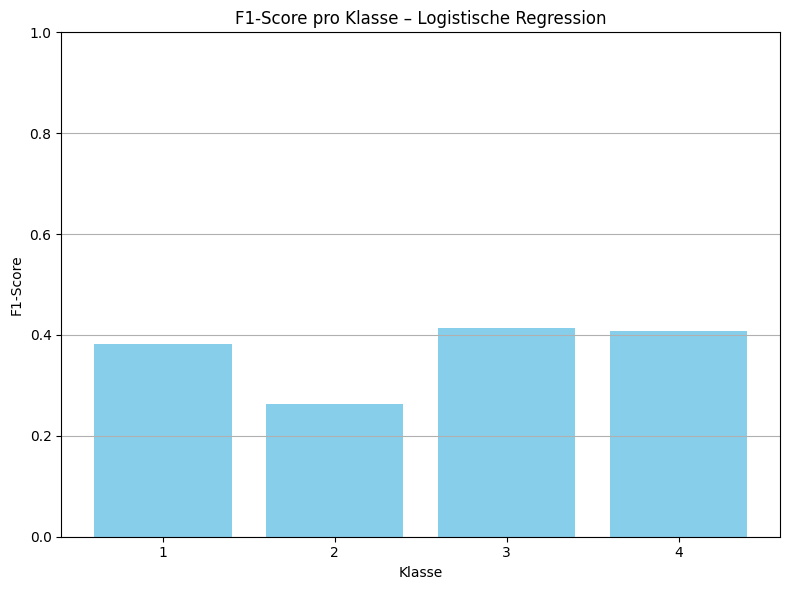

In [ ]:
from sklearn.metrics import classification_report

# Klassifikationsbericht als Dictionary
report = classification_report(y_test, y_pred_logreg, output_dict=True)

# F1-Score pro Klasse extrahieren
f1_per_class = {label: metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# Balkendiagramm
plt.figure(figsize=(8,6))
plt.bar(f1_per_class.keys(), f1_per_class.values(), color='skyblue')  # <- hier Farbe geändert
plt.xlabel('Klasse')
plt.ylabel('F1-Score')
plt.title('F1-Score pro Klasse – Logistische Regression')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

Text(0.3684210526315789, 0.39622641509433965, 'Klasse 1')

Text(0.3125, 0.22727272727272727, 'Klasse 2')

Text(0.38461538461538464, 0.44642857142857145, 'Klasse 3')

Text(0.41304347826086957, 0.40425531914893614, 'Klasse 4')

Text(0.5, 0, 'Precision')

Text(0, 0.5, 'Recall')

Text(0.5, 1.0, 'Precision vs. Recall pro Klasse – Logistic Regression')

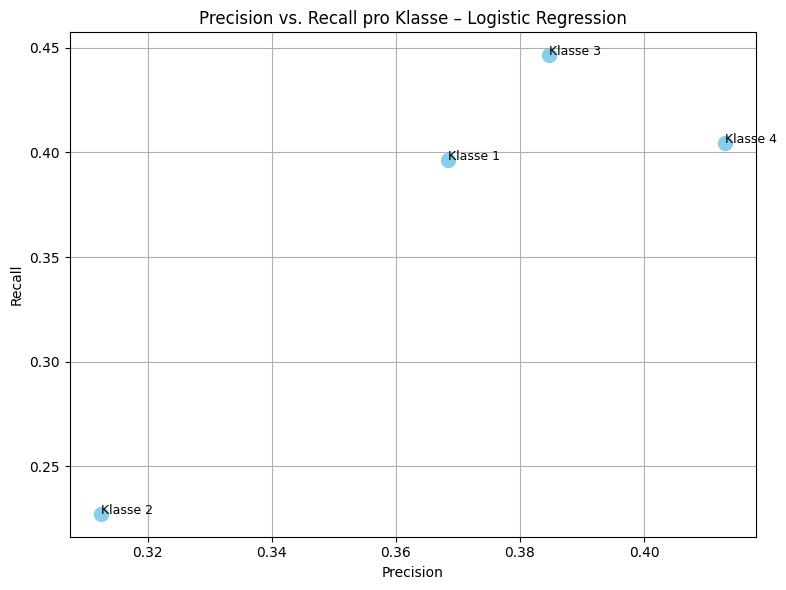

In [ ]:
# Precision & Recall extrahieren
precision_per_class = {label: metrics['precision'] for label, metrics in report.items() if label.isdigit()}
recall_per_class = {label: metrics['recall'] for label, metrics in report.items() if label.isdigit()}

# Plot erstellen
plt.figure(figsize=(8,6))
plt.scatter(precision_per_class.values(), recall_per_class.values(), s=100, c='skyblue')

# Klassenlables anzeigen
for label in precision_per_class:
    plt.text(precision_per_class[label], recall_per_class[label], f'Klasse {label}', fontsize=9)

plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision vs. Recall pro Klasse – Logistic Regression')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Precision, Recall, F1-Score pro Klasse – Logistic Regression')

Text(0.5, 36.72222222222221, 'Metrik')

Text(95.72222222222221, 0.5, 'Klasse')

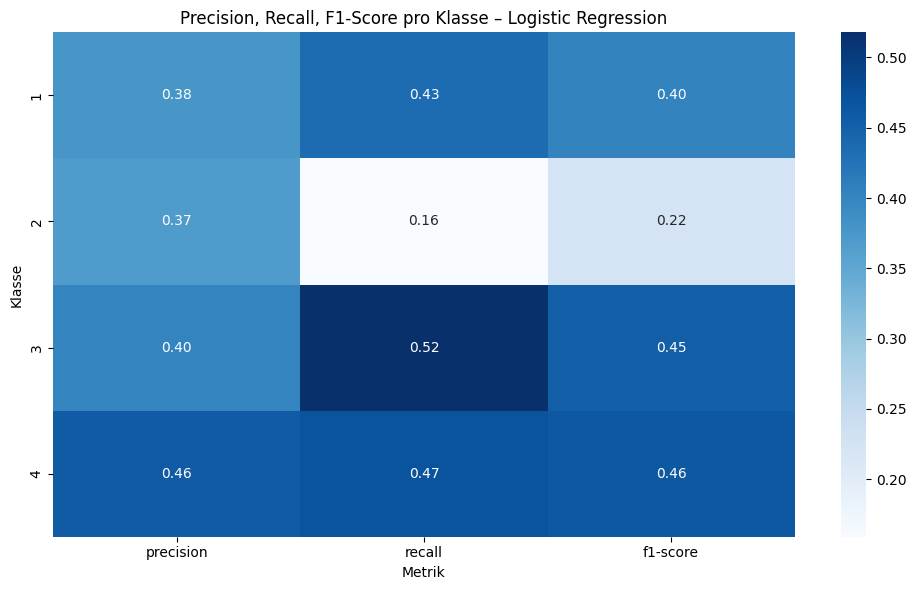

In [ ]:
# Bestes Modell aus GridSearch speichern
best_logreg = grid_search.best_estimator_

# Vorhersage mit dem besten Modell
y_pred_best_logreg = best_logreg.predict(X_test_scaled)

# DataFrame für Metriken pro Klasse erstellen (nur numerische Klassenlabels)
metrics_df = pd.DataFrame(
    {label: metrics for label, metrics in report.items() if label.isdigit()}
).T
metrics_df = metrics_df[['precision', 'recall', 'f1-score']]

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt=".2f")
plt.title("Precision, Recall, F1-Score pro Klasse – Logistic Regression")
plt.xlabel("Metrik")
plt.ylabel("Klasse")
plt.tight_layout()
plt.show()

<Axes: >

Text(0.5, 1.0, 'Feature Importance – Logistische Regression')

Text(0.5, 0, 'Koeffizienten (|Wert|)')

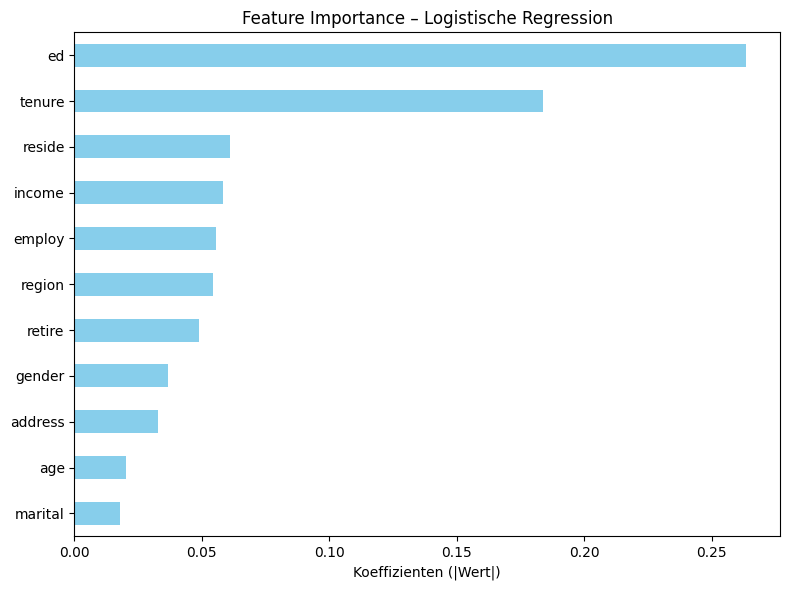

In [ ]:
# Zugriff auf die trainierten Koeffizienten (n_classes x n_features)
coefs = pd.DataFrame(abs(best_logreg.coef_), columns=X.columns)

# Mittelwert über alle Klassen
mean_coefs = coefs.mean(axis=0).sort_values()

# Balkendiagramm
mean_coefs.plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Feature Importance – Logistische Regression")
plt.xlabel("Koeffizienten (|Wert|)")
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Koeffizient')

Text(0, 0.5, 'Feature')

Text(0.5, 1.0, 'Top 10 Features für Klasse 4 (Logistische Regression)')

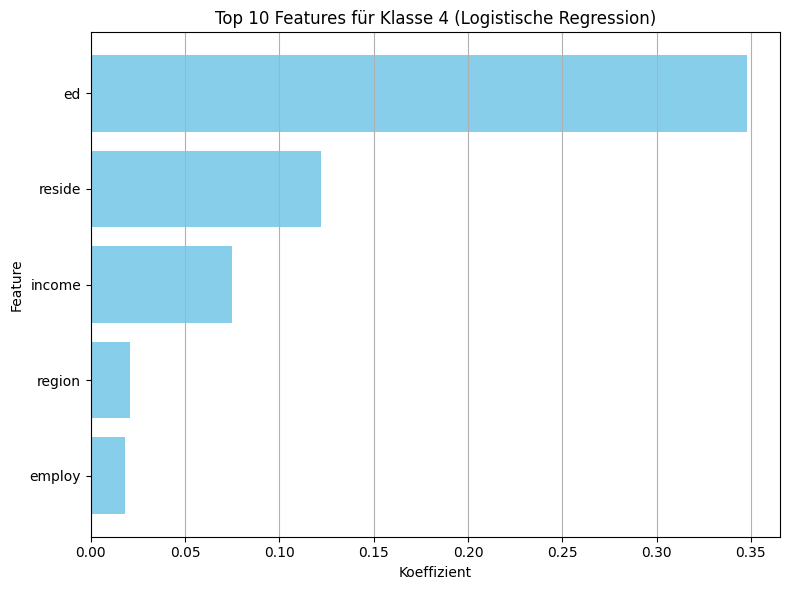

In [ ]:
# Feature-Namen holen
feature_names = X.columns

# Koeffizienten extrahieren für Klasse 4 (Index = 3, da 0-basiert)
class_index = 3
coefficients = best_logreg.coef_[class_index]

# DataFrame erstellen
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Koeffizient': coefficients
})

# Nach Einfluss sortieren
coef_df_sorted = coef_df.sort_values(by='Koeffizient', ascending=False)

# Top 5 Features für Klasse 4 auswählen
top_features = coef_df_sorted.head(5)

# Balkendiagramm
plt.figure(figsize=(8,6))
plt.barh(top_features['Feature'], top_features['Koeffizient'], color='skyblue')
plt.xlabel("Koeffizient")
plt.ylabel("Feature")
plt.title("Top 10 Features für Klasse 4 (Logistische Regression)")
plt.gca().invert_yaxis() # Größtes Feature oben
plt.grid(axis='x')
plt.tight_layout()
plt.show()